In [1]:
import pandas as pd
df = pd.read_csv('dataset_heart.csv')
df.head(1)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [3]:
df.shape

(270, 14)

In [4]:
new_columns = [col.replace(' ', '_') for col in df.columns]
df.columns = new_columns

In [5]:
df['heart_disease'] = df['heart_disease'].replace({1: 0, 2: 1})

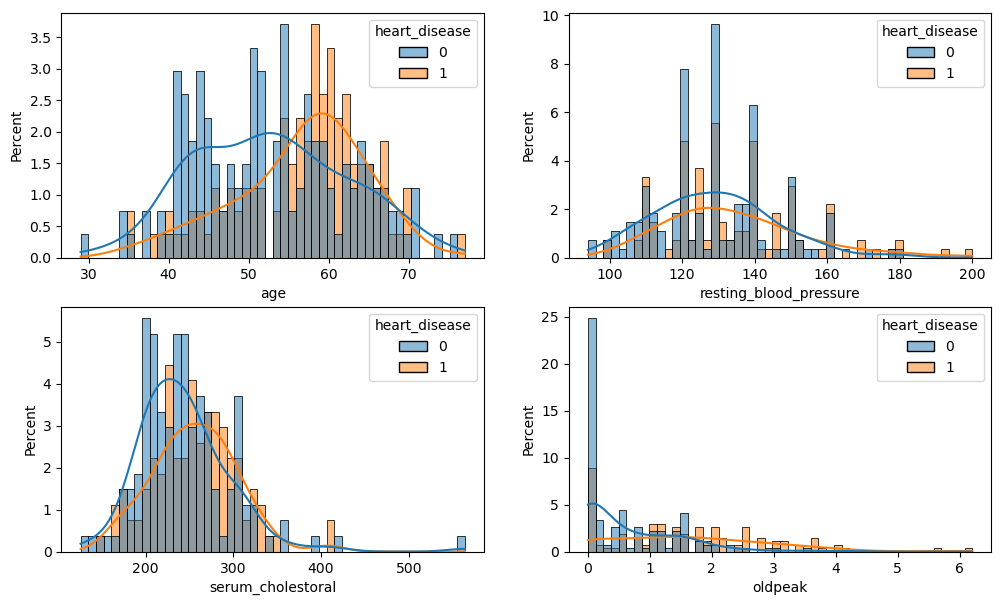

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
num_feat = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'oldpeak']
plt.figure(figsize = (12,7))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df, x=num_feat[i], hue='heart_disease', stat='percent', common_norm=True, kde=True, bins=50)

([<matplotlib.patches.Wedge at 0x21de68c5b80>,
 [Text(-0.1910130855889933, 1.083288512416601, '0'),
  Text(0.19101318701378264, -1.0832884945326604, '1')],
 [Text(-0.10418895577581451, 0.5908846431363277, '55.56'),
  Text(0.10418901109842689, -0.5908846333814511, '44.44')])

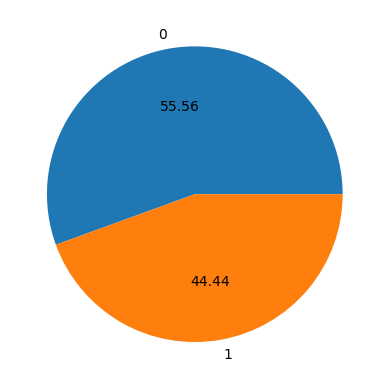

In [7]:
a = df['heart_disease'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
classifiers = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(random_state=0),
    "XGBoost": XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'),
    "LGBM": LGBMClassifier(random_state=0),
    "CatBoost": CatBoostClassifier(random_state=0, verbose=False),
    "NaiveBayes": GaussianNB()
}

C:\Users\lengu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [11]:
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

In [12]:
# Dictionary of all grids
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
grid = {
    "LogisticRegression": LR_grid,
    "KNN": KNN_grid,
    "RandomForest": RF_grid,
    "XGBoost": boosted_grid,
    "LGBM": boosted_grid,
    "CatBoost": boosted_grid,
    "NaiveBayes": NB_grid
}


In [13]:
import numpy as np
import time as time
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_test, y_test)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

C:\Users\lengu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lengu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lengu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lengu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Model: LogisticRegression
Training time (mins): 0.12



C:\Users\lengu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNN
Training time (mins): 0.01

Model: RandomForest
Training time (mins): 0.09



C:\Users\lengu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\lengu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: XGBoost
Training time (mins): 0.06

Model: LGBM
Training time (mins): 0.13



C:\Users\lengu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
11 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lengu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lengu\anaconda3\lib\site-packages\catboost\core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\lengu\anaconda3\lib\site-packages\catboost\core.py", line 2357, 

Model: CatBoost
Training time (mins): 1.58

Model: NaiveBayes
Training time (mins): 0.0



In [14]:
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.907407,0.12
1,KNN,0.703704,0.01
2,RandomForest,0.888889,0.09
3,XGBoost,0.833333,0.06
4,LGBM,0.814815,0.13
5,CatBoost,0.907407,1.58
6,NaiveBayes,0.907407,0.00


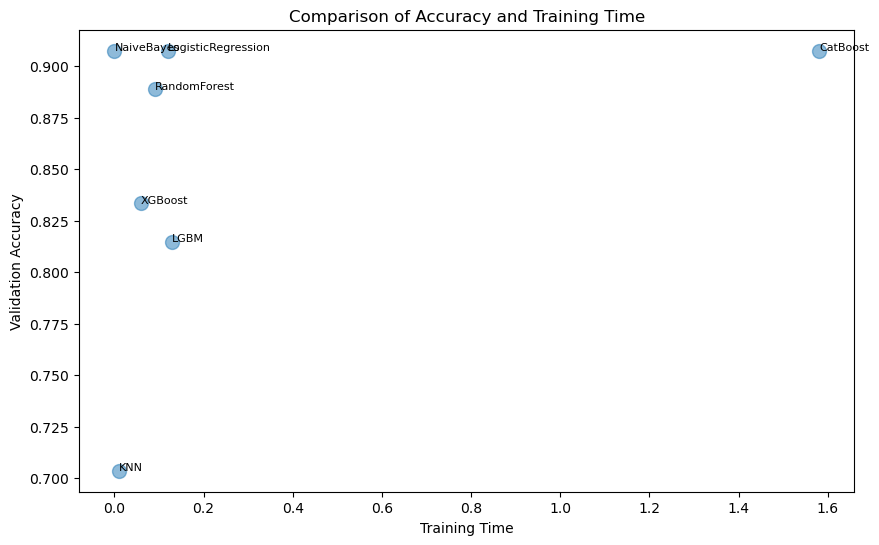

In [15]:
import matplotlib.pyplot as plt

# Extract the data from the valid_scores DataFrame
classifiers = valid_scores['Classifer']
accuracy = valid_scores['Validation accuracy']
training_time = valid_scores['Training time']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(training_time, accuracy, s=100, alpha=0.5)
plt.xlabel('Training Time')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Accuracy and Training Time')

# Add labels to the data points
for i in range(len(valid_scores)):
    plt.text(training_time[i], accuracy[i], classifiers[i], fontsize=8)
plt.show()

In [19]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "NaiveBayes": GaussianNB()
}

LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

NB_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

grid = {
    "LogisticRegression": LR_grid,
    "NaiveBayes": NB_grid
}

i = 0
clf_best_params = classifiers.copy()

for key, classifier in classifiers.items():
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)

    # Save trained model
    clf_best_params[key] = clf.best_params_
    joblib.dump(clf.best_estimator_, f"{key}_model.pkl")  # Save the model to a file

    i += 1

C:\Users\lengu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lengu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lengu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lengu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val